#Variable Explanation:

The additional variables we selected from the census data set are Employment status for district populations for those over the age of 16 total, total not in labor force, and total in labor force. 

It is important to note that the labor force is made up of those who are either employed or unemployed. With actively employed persons being in the employed category and those who are actively seeking work in the unemployed category. Those who fall under neither category are considered not in the labor force. 

#Hypothesis 

Based on our previous analysis, we believe that republicans will have a lower labor force participation rate than democrats becuase they tend to have a higher median age, rate of disability, rate of retired individuals, rate of stay at home moms, and a lower rate of health insurance.

This is because we expect republican districts to have a higher demographic of older people and others who support their platforms based on so called traditional family values. Amongst this group we expect that older people will be retired as well as be more likely to have a disability. We also expect women who work from home are more likely to support republicans due to their support of the nuclear family. Since the democratic party traditionally supports healthcare for all we expect that districts which are controlled by democrats will have more constituents with health care coverage. Households with healthcare are less likely to be out of the labor force as they will not need to stay home to take care of others.

#Previous Hypothesis 

According to the bureau of labor statistics those who fall in the category of not in the labor force are typically either in school, retired, or have family responsibilities such as caring for a sick family member. We hypothesize that these groups are all more likely to support democratic congressional candidates. We believe college students are more likely to support democratic candidates due to social believes and potential student loan payouts, retired persons are more likely to support democratic candidates as they typically support medicare and medicaid programs that will benefit the elderly, and those caring for the sick are more likely to support democratic candidates due to their support of healthcare programs. 

#Variable Explanation:

The additional variables we selected from the census data set are Employment status for district populations for those over the age of 16 total, total not in labor force, and total in labor force. 

It is important to note that the labor force is made up of those who are either employed or unemployed. With actively employed persons being in the employed category and those who are actively seeking work in the unemployed category. Those who fall under neither category are considered not in the labor force. 

#Data collection and Wrangling

            
### Our variables:
B23025_001E: EMPLOYMENT STATUS FOR THE POPULATION 16 YEARS AND OVER \
            Estimate!!Total: \
B23025_007E: EMPLOYMENT STATUS FOR THE POPULATION 16 YEARS AND OVER \
            Estimate!!Total:!!Not in labor force \
B23025_002E: EMPLOYMENT STATUS FOR THE POPULATION 16 YEARS AND OVER \
            Estimate!!Total:!!In labor force \
### New variables: 


In [ ]:
#import needed packages

import pandas as pd
import json
from urllib.request import urlopen
import matplotlib.pyplot as plt
import plotly.express as px
from urllib import request
import json
import numpy as np
import seaborn as sns

In [ ]:
#With all variables
url="https://api.census.gov/data/2021/acs/acs1?get=NAME,B23025_001E,B23025_007E,B01002_001E,B23001_009E,B23001_016E,B23001_023E,B23001_030E,B23001_037E,B23001_044E,B23001_051E,B23001_058E,B23001_065E,B23001_072E,B23001_077E,B23001_082E,B23001_087E,B23001_095E,B23001_102E,B23001_109E,B23001_116E,B23001_123E,B23001_130E,B23001_137E,B23001_144E,B23001_151E,B23001_158E,B23001_163E,B23001_168E,B23001_173E,B12006_007E,B12006_012E,B12006_018E,B12006_023E,B13012_005E,B13012_008E,B14005_006E,B14005_020E,B16010_009E,B16010_022E,B16010_035E,B16010_048E,B17005_007E,B17005_012E,B23003_016E,B27011_014E,C18120_010E,B23007_009E,B23007_009E&for=congressional%20district:*&in=state:*"
#,B14005_006E,B14005_020E. ,'Male in School','Female in school'
response = urlopen(url)
data_json = json.loads(response.read())
data_json.pop(0)
cols = ['District Name','Total Households','Not in labor force','Median Age','Male 16 to 19','Male 20 and 21','Male 22 to 24','Male 25 to 29','Male 30 to 34','Male 35 to 44','Male 45 to 54','Male 55 to 59','Male 60 and 61','Male 62 to 64','Male 65 to 69','Male 70 to 74','Male 75+','Female 16 to 19','Female 20 and 21','Female 22 to 24','Female 25 to 29','Female 30 to 34','Female 35 to 44','Female 45 to 54','Female 55 to 59','Female 60 and 61','Female 62 to 64','Female 65 to 69','Female 70 to 74','Female 75+','Never Married Male NIL','Never Married Female NIL','Currently Married Male NIL','Currently Married Female NIL','Birth In Past 12 Months Married NIL','Birth In Past 12 Months Not Married NIL','Enrolled in School Male Age 16 to 19 NIL','Enrolled in School Female Age 16 to 19 NIL','Did Not Graduate from Highschool NIL Age 25+ NIL','High School Graduate Age 25+ NIL','Some College or Assosciates Degree Age 25+ NIL','Bachelors Degree or Higher Age 25+ NIL','Below Poverty Level in Past 12 Months Male NIL','Below Poverty Level in Past 12 Months Female NIL','Have Children Under 18 and are Female 20-64 yrs old NIL','With Health Insurance NIL','With Disability NIL','Child-Under18 Husband-IL-UnEmp Wife-NIL','Child-Under18 Husband-IL-Emp Wife-NIL','State code', 'district number']
acs_df = pd.DataFrame(data_json, columns = cols)
acs_df[['District', 'State']] = acs_df['District Name'].str.split(',', expand=True)
acs_df['district number'] = pd.to_numeric(acs_df['district number'])
acs_df['State'] = acs_df['State'].str.strip()
acs_df = acs_df[['Total Households', 'Not in labor force', 'Median Age','Enrolled in School Male Age 16 to 19 NIL','Enrolled in School Female Age 16 to 19 NIL','Male 16 to 19','Male 20 and 21','Male 22 to 24','Male 25 to 29','Male 30 to 34','Male 35 to 44','Male 45 to 54','Male 55 to 59','Male 60 and 61','Male 62 to 64','Female 16 to 19','Female 20 and 21','Female 22 to 24','Female 25 to 29','Female 30 to 34','Female 35 to 44','Female 45 to 54','Female 55 to 59','Female 60 and 61','Female 62 to 64','Never Married Male NIL','Never Married Female NIL','Currently Married Male NIL','Currently Married Female NIL','Birth In Past 12 Months Married NIL','Birth In Past 12 Months Not Married NIL','Did Not Graduate from Highschool NIL Age 25+ NIL','High School Graduate Age 25+ NIL','Some College or Assosciates Degree Age 25+ NIL','Bachelors Degree or Higher Age 25+ NIL','Below Poverty Level in Past 12 Months Male NIL','Below Poverty Level in Past 12 Months Female NIL','Have Children Under 18 and are Female 20-64 yrs old NIL','With Health Insurance NIL','With Disability NIL','Female 65 to 69','Female 70 to 74','Female 75+','Male 65 to 69','Male 70 to 74','Male 75+','Child-Under18 Husband-IL-UnEmp Wife-NIL','Child-Under18 Husband-IL-Emp Wife-NIL','district number', 'State']]
acs_df.head()

,Total Households,Not in labor force,Median Age,Enrolled in School Male Age 16 to 19 NIL,Enrolled in School Female Age 16 to 19 NIL,Male 16 to 19,Male 20 and 21,Male 22 to 24,Male 25 to 29,Male 30 to 34,...,Female 65 to 69,Female 70 to 74,Female 75+,Male 65 to 69,Male 70 to 74,Male 75+,Child-Under18 Husband-IL-UnEmp Wife-NIL,Child-Under18 Husband-IL-Emp Wife-NIL,district number,State
0,589957,251361,41.1,7877,8348,10609,2079,2314,3907,4710,...,18532,17086,29257,14871,15482,21253,11493,11493,1,Alabama
1,551583,241939,39.2,10901,8943,12044,2267,3237,3114,4070,...,17036,14352,28476,13143,11948,18216,8723,8723,2,Alabama
2,599266,269032,39.4,14490,10706,16002,4586,5026,3843,3360,...,18255,17917,26592,13880,14527,18802,12657,12657,3,Alabama
3,564198,244650,40.7,8092,9098,8823,2279,1384,3936,2460,...,18002,17975,28841,14231,15230,19318,14198,14198,4,Alabama
4,625198,249103,40.3,9322,11620,10093,3969,2851,2544,4603,...,17911,16731,30506,11914,14504,19305,18311,18311,5,Alabama


In [ ]:
list(acs_df.columns.values)

['Total Households',
 'Not in labor force',
 'Median Age',
 'Enrolled in School Male Age 16 to 19 NIL',
 'Enrolled in School Female Age 16 to 19 NIL',
 'Male 16 to 19',
 'Male 20 and 21',
 'Male 22 to 24',
 'Male 25 to 29',
 'Male 30 to 34',
 'Male 35 to 44',
 'Male 45 to 54',
 'Male 55 to 59',
 'Male 60 and 61',
 'Male 62 to 64',
 'Female 16 to 19',
 'Female 20 and 21',
 'Female 22 to 24',
 'Female 25 to 29',
 'Female 30 to 34',
 'Female 35 to 44',
 'Female 45 to 54',
 'Female 55 to 59',
 'Female 60 and 61',
 'Female 62 to 64',
 'Never Married Male NIL',
 'Never Married Female NIL',
 'Currently Married Male NIL',
 'Currently Married Female NIL',
 'Birth In Past 12 Months Married NIL',
 'Birth In Past 12 Months Not Married NIL',
 'Did Not Graduate from Highschool NIL Age 25+ NIL',
 'High School Graduate Age 25+ NIL',
 'Some College or Assosciates Degree Age 25+ NIL',
 'Bachelors Degree or Higher Age 25+ NIL',
 'Below Poverty Level in Past 12 Months Male NIL',
 'Below Poverty Level in P

### Merge with Congressional Statistics, 2021
https://www.ssa.gov/policy/docs/factsheets/cong_stats/

In [ ]:
url = 'https://raw.githubusercontent.com/maxsohl/CongressionalBook/main/Retire_disab.csv'
ret_disab_df = pd.read_csv(url)

In [ ]:
states = {
        'AK': 'Alaska',
        'AL': 'Alabama',
        'AR': 'Arkansas',
        'AS': 'American Samoa',
        'AZ': 'Arizona',
        'CA': 'California',
        'CO': 'Colorado',
        'CT': 'Connecticut',
        'DC': 'District of Columbia',
        'DE': 'Delaware',
        'FL': 'Florida',
        'GA': 'Georgia',
        'GU': 'Guam',
        'HI': 'Hawaii',
        'IA': 'Iowa',
        'ID': 'Idaho',
        'IL': 'Illinois',
        'IN': 'Indiana',
        'KS': 'Kansas',
        'KY': 'Kentucky',
        'LA': 'Louisiana',
        'MA': 'Massachusetts',
        'MD': 'Maryland',
        'ME': 'Maine',
        'MI': 'Michigan',
        'MN': 'Minnesota',
        'MO': 'Missouri',
        'MP': 'Northern Mariana Islands',
        'MS': 'Mississippi',
        'MT': 'Montana',
        'NA': 'National',
        'NC': 'North Carolina',
        'ND': 'North Dakota',
        'NE': 'Nebraska',
        'NH': 'New Hampshire',
        'NJ': 'New Jersey',
        'NM': 'New Mexico',
        'NV': 'Nevada',
        'NY': 'New York',
        'OH': 'Ohio',
        'OK': 'Oklahoma',
        'OR': 'Oregon',
        'PA': 'Pennsylvania',
        'PR': 'Puerto Rico',
        'RI': 'Rhode Island',
        'SC': 'South Carolina',
        'SD': 'South Dakota',
        'TN': 'Tennessee',
        'TX': 'Texas',
        'UT': 'Utah',
        'VA': 'Virginia',
        'VI': 'Virgin Islands',
        'VT': 'Vermont',
        'WA': 'Washington',
        'WI': 'Wisconsin',
        'WV': 'West Virginia',
        'WY': 'Wyoming'
}


# Convert the state abbreviations to state names using the map function
ret_disab_df['State'] = ret_disab_df['State'].map(states)
ret_disab_df

,State,district number,Retired,disabled
0,Alabama,1,"119,556","28,295"
1,Alabama,2,"107,538","31,216"
2,Alabama,3,"110,138","33,798"
3,Alabama,4,"115,246","33,684"
4,Alabama,5,"111,545","23,313"
...,...,...,...,...
432,Wisconsin,5,"127,156","14,874"
433,Wisconsin,6,"133,540","18,854"
434,Wisconsin,7,"151,571","21,304"
435,Wisconsin,8,"129,757","18,360"


In [ ]:
#Remove commas from numbers 
ret_disab_df['Retired'] = pd.to_numeric(ret_disab_df['Retired'].str.replace(',', ''))
ret_disab_df['disabled'] = pd.to_numeric(ret_disab_df['disabled'].str.replace(',', ''))

In [ ]:
#Check datatypes
print(ret_disab_df.dtypes)

State              object
district number     int64
Retired             int64
disabled            int64
dtype: object


In [ ]:
#Merge here
acs_df = pd.merge(acs_df, ret_disab_df, on=["State", "district number"])
acs_df

,Total Households,Not in labor force,Median Age,Enrolled in School Male Age 16 to 19 NIL,Enrolled in School Female Age 16 to 19 NIL,Male 16 to 19,Male 20 and 21,Male 22 to 24,Male 25 to 29,Male 30 to 34,...,Female 75+,Male 65 to 69,Male 70 to 74,Male 75+,Child-Under18 Husband-IL-UnEmp Wife-NIL,Child-Under18 Husband-IL-Emp Wife-NIL,district number,State,Retired,disabled
0,589957,251361,41.1,7877,8348,10609,2079,2314,3907,4710,...,29257,14871,15482,21253,11493,11493,1,Alabama,119556,28295
1,551583,241939,39.2,10901,8943,12044,2267,3237,3114,4070,...,28476,13143,11948,18216,8723,8723,2,Alabama,107538,31216
2,599266,269032,39.4,14490,10706,16002,4586,5026,3843,3360,...,26592,13880,14527,18802,12657,12657,3,Alabama,110138,33798
3,564198,244650,40.7,8092,9098,8823,2279,1384,3936,2460,...,28841,14231,15230,19318,14198,14198,4,Alabama,115246,33684
4,625198,249103,40.3,9322,11620,10093,3969,2851,2544,4603,...,30506,11914,14504,19305,18311,18311,5,Alabama,111545,23313
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,530703,191040,33.9,10730,9472,13052,3027,3292,4263,3277,...,20014,10097,9221,12732,7767,7767,4,Wisconsin,73724,21039
424,607826,198614,42.1,7335,6553,7995,1695,1870,2417,1209,...,31103,13573,14501,21341,10674,10674,5,Wisconsin,127156,14874
425,595941,214740,42.1,8334,5972,9102,1297,1800,3605,2847,...,31266,15518,15279,21730,9446,9446,6,Wisconsin,133540,18854
426,601895,229527,45.0,7085,5911,7904,1544,1751,1914,2145,...,32834,19007,18280,25908,9865,9865,7,Wisconsin,151571,21304


In [ ]:
# Convert the number columns into number data types

df_n = acs_df[['Total Households', 'Not in labor force', 'Median Age','Enrolled in School Male Age 16 to 19 NIL','Enrolled in School Female Age 16 to 19 NIL','Male 16 to 19','Male 20 and 21','Male 22 to 24','Male 25 to 29','Male 30 to 34','Male 35 to 44','Male 45 to 54','Male 55 to 59','Male 60 and 61','Male 62 to 64','Female 16 to 19','Female 20 and 21','Female 22 to 24','Female 25 to 29','Female 30 to 34','Female 35 to 44','Female 45 to 54','Female 55 to 59','Female 60 and 61','Female 62 to 64','Never Married Male NIL','Never Married Female NIL','Currently Married Male NIL','Currently Married Female NIL','Birth In Past 12 Months Married NIL','Birth In Past 12 Months Not Married NIL','Did Not Graduate from Highschool NIL Age 25+ NIL','High School Graduate Age 25+ NIL','Some College or Assosciates Degree Age 25+ NIL','Bachelors Degree or Higher Age 25+ NIL','Below Poverty Level in Past 12 Months Male NIL','Below Poverty Level in Past 12 Months Female NIL','Have Children Under 18 and are Female 20-64 yrs old NIL','With Health Insurance NIL','With Disability NIL','Female 65 to 69','Female 70 to 74','Female 75+','Male 65 to 69','Male 70 to 74','Male 75+','Child-Under18 Husband-IL-UnEmp Wife-NIL','Child-Under18 Husband-IL-Emp Wife-NIL','Retired','disabled']]
col = df_n.columns
acs_df[col] = acs_df[col].apply(pd.to_numeric, errors='coerce')
acs_df = acs_df.fillna(0)

acs_df['% of households not in labor force'] = (100*acs_df['Not in labor force'])/acs_df['Total Households']
acs_df['% Age 16-19 in School'] = (100*(acs_df['Enrolled in School Male Age 16 to 19 NIL']+acs_df['Enrolled in School Female Age 16 to 19 NIL']))/(acs_df['Male 16 to 19']+acs_df['Female 16 to 19'])
acs_df['% not-in-LaborF above 65'] = (100*(acs_df['Male 65 to 69']+acs_df['Male 70 to 74']+acs_df['Male 75+']+acs_df['Female 65 to 69']+acs_df['Female 70 to 74']+acs_df['Female 75+']))/acs_df['Not in labor force']
acs_df.head()


,Total Households,Not in labor force,Median Age,Enrolled in School Male Age 16 to 19 NIL,Enrolled in School Female Age 16 to 19 NIL,Male 16 to 19,Male 20 and 21,Male 22 to 24,Male 25 to 29,Male 30 to 34,...,Male 75+,Child-Under18 Husband-IL-UnEmp Wife-NIL,Child-Under18 Husband-IL-Emp Wife-NIL,district number,State,Retired,disabled,% of households not in labor force,% Age 16-19 in School,% not-in-LaborF above 65
0,589957,251361,41.1,7877.0,8348.0,10609,2079,2314,3907,4710,...,21253,11493,11493,1,Alabama,119556,28295,42.606665,78.087400,46.340124
1,551583,241939,39.2,10901.0,8943.0,12044,2267,3237,3114,4070,...,18216,8723,8723,2,Alabama,107538,31216,43.862664,86.409754,42.643394
2,599266,269032,39.4,14490.0,10706.0,16002,4586,5026,3843,3360,...,18802,12657,12657,3,Alabama,110138,33798,44.893586,90.182183,40.877293
3,564198,244650,40.7,8092.0,9098.0,8823,2279,1384,3936,2460,...,19318,14198,14198,4,Alabama,115246,33684,43.362437,91.475096,46.432455
4,625198,249103,40.3,9322.0,11620.0,10093,3969,2851,2544,4603,...,19305,18311,18311,5,Alabama,111545,23313,39.843857,91.179032,44.508095


### Party affiliation data

In [ ]:
# read from the congressional data and put into a pandas dataframe
party_df = pd.read_csv("http://goodcsv.com/wp-content/uploads/2020/08/us-house-of-representatives-2020.csv", encoding = "ISO-8859-1")

# extract the district number from the data (it was in the format of 5th and we want that to just be 5) using a regular expression.
party_df['district number'] = party_df['District/Position'].str.extract('(\d+)')
party_df['district number'] = party_df['district number'].fillna(0)
party_df['district number'] = pd.to_numeric(party_df['district number'])
party_df['State'] = party_df['State/Territory']
party_df['State'] = party_df['State'].str.strip()
party_df['Party'] = party_df['Party'].str.strip() # remove extraneous whitespace

# Let's just keep the columns we need
party_df = party_df[['State', 'Party', "district number"]]

party_df.head(500)

,State,Party,district number
0,Louisiana,R,5
1,North Carolina,D,12
2,Alabama,R,4
3,California,D,31
4,Georgia,R,12
...,...,...,...
436,Texas,R,6
437,Kentucky,D,3
438,Florida,R,3
439,Alaska,R,0


### Merge Party affiliation and labor Force data
Merge on State and District number

In [ ]:
party_df.head(100)
merged_df = pd.merge(acs_df, party_df, on=["State", "district number"])
merged_df['Party'].value_counts()

D    231
R    196
L      1
Name: Party, dtype: int64

### Merge Data With Region Data

In [ ]:
#Load Region Data from github repository
region_df = pd.read_csv('https://raw.githubusercontent.com/cphalpert/census-regions/master/us%20census%20bureau%20regions%20and%20divisions.csv')
region_df = region_df[['State', 'Region']]

In [ ]:
#Merge
merged_df = pd.merge(merged_df, region_df, on=["State"])
merged_df

,Total Households,Not in labor force,Median Age,Enrolled in School Male Age 16 to 19 NIL,Enrolled in School Female Age 16 to 19 NIL,Male 16 to 19,Male 20 and 21,Male 22 to 24,Male 25 to 29,Male 30 to 34,...,Child-Under18 Husband-IL-Emp Wife-NIL,district number,State,Retired,disabled,% of households not in labor force,% Age 16-19 in School,% not-in-LaborF above 65,Party,Region
0,589957,251361,41.1,7877.0,8348.0,10609,2079,2314,3907,4710,...,11493,1,Alabama,119556,28295,42.606665,78.087400,46.340124,R,South
1,551583,241939,39.2,10901.0,8943.0,12044,2267,3237,3114,4070,...,8723,2,Alabama,107538,31216,43.862664,86.409754,42.643394,R,South
2,599266,269032,39.4,14490.0,10706.0,16002,4586,5026,3843,3360,...,12657,3,Alabama,110138,33798,44.893586,90.182183,40.877293,R,South
3,564198,244650,40.7,8092.0,9098.0,8823,2279,1384,3936,2460,...,14198,4,Alabama,115246,33684,43.362437,91.475096,46.432455,R,South
4,625198,249103,40.3,9322.0,11620.0,10093,3969,2851,2544,4603,...,18311,5,Alabama,111545,23313,39.843857,91.179032,44.508095,R,South
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,530703,191040,33.9,10730.0,9472.0,13052,3027,3292,4263,3277,...,7767,4,Wisconsin,73724,21039,35.997535,86.983854,39.993719,D,Midwest
424,607826,198614,42.1,7335.0,6553.0,7995,1695,1870,2417,1209,...,10674,5,Wisconsin,127156,14874,32.676128,94.143167,58.066400,R,Midwest
425,595941,214740,42.1,8334.0,5972.0,9102,1297,1800,3605,2847,...,9446,6,Wisconsin,133540,18854,36.033768,91.917245,55.346000,R,Midwest
426,601895,229527,45.0,7085.0,5911.0,7904,1544,1751,1914,2145,...,9865,7,Wisconsin,151571,21304,38.134060,89.522629,58.655844,R,Midwest


#Analysis and Data Visualization 

## State Level Analysis

### Map View Analysis By Party

In [ ]:
#abreviations for state names
us_state_to_abbrev = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "U.S. Virgin Islands": "VI",
}

In [ ]:

# State Level data frame

df_state_1 = pd.pivot_table(merged_df, index="State", values=(['Total Households', 'Not in labor force']),aggfunc=sum)

df_state_2 = pd.pivot_table(merged_df, index="State", columns = (['Party']),aggfunc='count')
df_state_3 = pd.pivot_table(merged_df, index="State", values= (['Median Age']),aggfunc='mean')

df_state_2 = df_state_2[['Total Households', 'Not in labor force']]
df_state_2.columns = df_state_2.columns.map('_'.join)
col = df_state_2.columns
df_state_2[col] = df_state_2[col].apply(pd.to_numeric, errors='coerce')
df_state_2 = df_state_2.fillna(0)
df_state_2['R_Ratio'] = df_state_2['Total Households_R']/(df_state_2['Total Households_D']+df_state_2['Total Households_L']+df_state_2['Total Households_R'])
df_state_2 = df_state_2[['R_Ratio']]

df_state = pd.merge(df_state_1, df_state_2, on=["State"])
df_state = pd.merge(df_state, df_state_3, on=["State"])
df_state['Not in Labor Force Rate']= (100*df_state['Not in labor force']/df_state['Total Households'])
df_state.reset_index(inplace=True)

##  State Level Geo Map

df_state['State_Code'] = df_state.State.map(us_state_to_abbrev)

fig_e1 = px.choropleth(df_state, locations='State_Code', locationmode="USA-states", scope="usa", color='Not in Labor Force Rate',color_continuous_scale="viridis")
fig_e1.show()


##  State Level Geo Map (Median Age)

#df_state['State_Code'] = df_state.State.map(us_state_to_abbrev)

#fig_e1 = px.choropleth(df_state, locations='State_Code', locationmode="USA-states", scope="usa", color='Median Age',color_continuous_scale="viridis")
#fig_e1.show()





In [ ]:
##  State Level Political sub Geo Map

df_state['State_Code'] = df_state.State.map(us_state_to_abbrev)
df_state['Party'] = np.where(df_state['R_Ratio']>= 0.5, 'Republican Majority', 'Democratic Majorty')

fig_e3 = px.choropleth(df_state, locations='State_Code', locationmode="USA-states", scope="usa", color='Not in Labor Force Rate',color_continuous_scale="viridis", facet_col="Party" )
fig_e3.show()



### Regional Analysis

In [ ]:
grouped_regions = merged_df.groupby('Region').mean()
grouped_regions

,Total Households,Not in labor force,Median Age,Enrolled in School Male Age 16 to 19 NIL,Enrolled in School Female Age 16 to 19 NIL,Male 16 to 19,Male 20 and 21,Male 22 to 24,Male 25 to 29,Male 30 to 34,...,Male 70 to 74,Male 75+,Child-Under18 Husband-IL-UnEmp Wife-NIL,Child-Under18 Husband-IL-Emp Wife-NIL,district number,Retired,disabled,% of households not in labor force,% Age 16-19 in School,% not-in-LaborF above 65
Region,,,,,,,,,,,,,,,,,,,,,
Midwest,585997.239130,211034.467391,39.277174,10133.076087,8667.282609,11272.336957,2803.760870,2448.293478,2996.847826,2690.989130,...,12937.086957,18780.239130,11422.967391,11422.967391,6.423913,107539.358696,18553.065217,36.071495,90.298009,49.152906
Northeast,601254.233766,217260.493506,40.703896,9473.558442,8409.493506,12431.116883,3717.207792,2898.337662,3519.142857,3009.298701,...,12585.454545,19429.558442,10926.038961,10926.038961,9.038961,105863.818182,17744.493506,36.217497,75.830035,48.186614
South,628056.487500,240500.975000,38.960625,11500.256250,10787.262500,13585.487500,3418.000000,3043.981250,3642.325000,3598.868750,...,13410.662500,19606.475000,14479.106250,14479.106250,9.537500,111497.943750,20891.925000,38.461948,85.564477,44.079609
West,618223.777778,226137.090909,37.888889,11067.474747,10716.636364,12993.898990,3147.373737,3191.898990,4019.656566,3719.787879,...,12756.373737,19063.585859,15823.222222,15823.222222,16.222222,100642.050505,17345.616162,36.650107,85.153114,43.768210


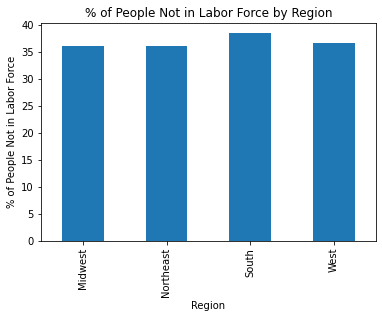

In [ ]:
grouped_regions['% of households not in labor force'].plot(kind='bar')
plt.xlabel('Region')
plt.ylabel('% of People Not in Labor Force')
plt.title('% of People Not in Labor Force by Region')
plt.show()

### Party Dominance Ratio
- To better assess how the "Not in Labor Force Rate" would impact/reflect the political affiliation we categorize the US states political affiliation based on more griadient political affiliation variable with One (Solid Red) represending states with 100% of the congressional districts dominated by Republicans and and Zero being the states with 100% democrares domination.

- The plot provide didn't provide support for our original hypothesis where the Red/Republican dominant states are having relatively higher values of "Not in Labor Force Rate", compared to the Blue/Democratic demonant states



[]

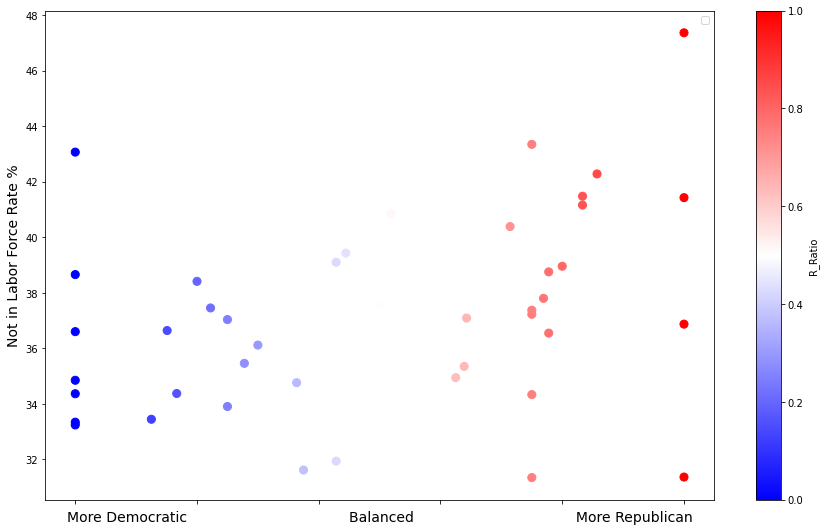

In [ ]:
## Democratic districts ratio vs Not in Labor Force Rate

fig_e2, ax = plt.subplots(figsize=(15, 9))
pos = df_state.plot.scatter(x='R_Ratio', y='Not in Labor Force Rate', c='R_Ratio',s=65, cmap='bwr', ax=ax)
plt.ylabel("Not in Labor Force Rate %", fontsize=14)
plt.xlabel("More Democratic                                    Balanced                                    More Republican", fontsize=14)
plt.legend([])
ax.set_xticklabels([])


#sm = plt.cm.ScalarMappable(cmap='bwr', norm=plt.Normalize(vmin=0, vmax=1))
#sm._A = []
#plt.colorbar(sm)
#plt.show()

## District Level Analysis

### Variance Analysis

- In This part we tried to understand the main factor behind the wide range of "Not in Labor Force Rate" among different states/districts, spaning from **25%** up to **57%** on district level
- While there are many reasons for not  being in Labor Force, we found that that it is highly correlated with the age group distribution, **clearly the higher the "Population Median Age" on a district level the higher the "Not in Labor Force Rate"** 
- Additionally, The Republican districts are generally having higher "Median Age" which is providing good explanation for higher "Not in Labor Force Rate(s)" among the Rebuplican states/districts as observed from the previous map view.

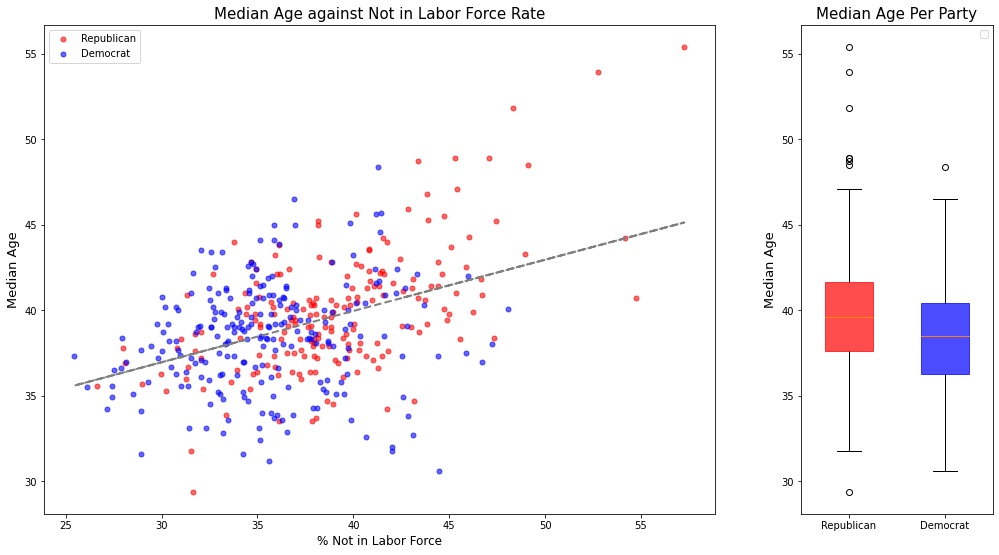

In [ ]:


import warnings
warnings.filterwarnings('ignore')

# Filtering on district with high % of not in labor force
#merged_df = merged_df.loc[(merged_df['% of households not in labor force'] >= 43)]

merged_df['high_NIL_Percent'] = np.where(merged_df['% of households not in labor force'] >= 43, 1, 0)

merged_df['low_NIL_Percent'] = np.where(merged_df['% of households not in labor force'] < 31, 1, 0)
merged_df
df_age = merged_df

#District level variables
df_age['% Age 16-24 not in Labor Force']=(100*(df_age['Male 16 to 19']+df_age['Female 16 to 19']+df_age['Male 20 and 21']+df_age['Female 20 and 21']+df_age['Male 22 to 24']+df_age['Female 22 to 24'])/df_age['Not in labor force'])
df_age['% Age 25-34 not in Labor Force']=(100*(df_age['Male 25 to 29']+df_age['Male 30 to 34']+df_age['Female 25 to 29']+df_age['Female 30 to 34'])/df_age['Not in labor force'])
df_age['% Age 35-54 not in Labor Force']=(100*(df_age['Male 35 to 44']+df_age['Male 45 to 54']+df_age['Female 35 to 44']+df_age['Female 45 to 54'])/df_age['Not in labor force'])
df_age['% Age 55-64 not in Labor Force']=(100*(df_age['Male 55 to 59']+df_age['Male 60 and 61']+df_age['Male 62 to 64']+df_age['Female 55 to 59']+df_age['Female 60 and 61']+df_age['Female 62 to 64'])/df_age['Not in labor force'])
df_age['% Age 65+ not in Labor Force']=(100*(df_age['Male 65 to 69']+df_age['Male 70 to 74']+df_age['Male 75+']+df_age['Female 65 to 69']+df_age['Female 70 to 74']+df_age['Female 75+'])/df_age['Not in labor force'])
df_age['% Age 16-19 in School NIL'] = (100*(df_age['Enrolled in School Male Age 16 to 19 NIL']+df_age['Enrolled in School Female Age 16 to 19 NIL']))/df_age['Not in labor force']
df_age['% Female under65 not-in-school NIL'] = (100*(df_age['Female 16 to 19']-df_age['Enrolled in School Female Age 16 to 19 NIL']+df_age['Female 20 and 21']+df_age['Female 22 to 24']+df_age['Female 25 to 29']+df_age['Female 30 to 34']+df_age['Female 35 to 44']+df_age['Female 45 to 54']+df_age['Female 55 to 59']+df_age['Female 60 and 61']+df_age['Female 62 to 64']))/df_age['Not in labor force']
df_age['% Women with birth last-12month NIL'] = (100*(df_age['Birth In Past 12 Months Married NIL']+df_age['Birth In Past 12 Months Not Married NIL']))/df_age['Not in labor force']
df_age['% Housewife: Child-Under18 Husband-IL'] = (100*(df_age['Child-Under18 Husband-IL-UnEmp Wife-NIL']+df_age['Child-Under18 Husband-IL-Emp Wife-NIL']))/df_age['Not in labor force']
df_age['% Male under65 not-in-school NIL'] = (100*(df_age['Male 16 to 19']-df_age['Enrolled in School Male Age 16 to 19 NIL']+df_age['Male 20 and 21']+df_age['Male 22 to 24']+df_age['Male 25 to 29']+df_age['Male 30 to 34']+df_age['Male 35 to 44']+df_age['Male 45 to 54']+df_age['Male 55 to 59']+df_age['Male 60 and 61']+df_age['Male 62 to 64']))/df_age['Not in labor force']
merged_df['Housewife: Child-Under18 Husband-IL'] = merged_df['Child-Under18 Husband-IL-UnEmp Wife-NIL']+merged_df['Child-Under18 Husband-IL-Emp Wife-NIL']
df_age


R = df_age[df_age['Party'].str.contains('R')]
D = df_age[df_age['Party'].str.contains('D')]

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(17, 9),gridspec_kw={'width_ratios': [3.5, 1]})
R.plot.scatter(x='% of households not in labor force', y=['Median Age'], c='red', alpha=0.6, s=25,label='Republican', ax=ax1)
D.plot.scatter(x='% of households not in labor force', y=['Median Age'],c='blue', alpha=0.6,s=25,label='Democrat', ax=ax1)
#calculate equation for trendline
z = np.polyfit(df_age['% of households not in labor force'], df_age['Median Age'], 1)
p = np.poly1d(z)
#add trendline to plot
ax1.plot(df_age['% of households not in labor force'], p(df_age['% of households not in labor force']), color="grey", linewidth=2, linestyle="--")
ax1.set_xlabel('% Not in Labor Force', color = 'black', fontsize='12', horizontalalignment='center')
ax1.set_ylabel('Median Age', color = 'black', fontsize='13', horizontalalignment='center')
ax1.set_title('Median Age against Not in Labor Force Rate',size=15)

data = [R['Median Age'], D['Median Age']]
bp =ax2.boxplot(data,patch_artist=True, labels=['Republican', 'Democrat'],widths=0.5)
bp['boxes'][0].set_facecolor('red')
bp['boxes'][0].set_color('red')
bp['boxes'][0].set_alpha(0.7)
bp['boxes'][1].set_facecolor('blue')
bp['boxes'][1].set_color('blue')
bp['boxes'][1].set_alpha(0.7)
ax2.set_ylabel('Median Age', size=13)
ax2.set_title('Median Age Per Party',size=15)
plt.legend()
plt.show()
    





### Congressional District Grouping
- While we have many democratic and also republican districts with relatively high but also low "Not In Labor Force rates" we do believe that we should have significant demographic and behavioral differences between both parties.
- To better identify those differences we will creat four distict district groups as follow
  -  **Democratic** districts with **high** "Not in Labor Force Rate" (4th Quartile)
  - **Republican** districts with **high** "Not in Labor Force Rate" (4th Quartile)
  - **Democratic** districts with **Low** "Not in Labor Force Rate" (1st Quartile)
  - **Republican** districts with **Low** "Not in Labor Force Rate" (1st Quartile)

### Demographic and behavioral Analysis

- We split our datast based on the graph from our previous analysis into high and low Not in Labor Force groups and looked into the below four variables we believed would be the most differentiating ones
  - Disability 
  - Retirement 
  - Stay at home month
  - Health Insurance


In [ ]:
high_NIL_Percent = merged_df[merged_df['% of households not in labor force'] >= 43]

low_NIL_Percent = merged_df[merged_df['% of households not in labor force'] < 43]

democrats_high = high_NIL_Percent[high_NIL_Percent['Party'] == 'D']
republicans_high = high_NIL_Percent[high_NIL_Percent['Party'] == 'R']
democrats_low = low_NIL_Percent[low_NIL_Percent['Party'] == 'D']
republicans_low = low_NIL_Percent[low_NIL_Percent['Party'] == 'R']



To try and understand what groups influence who falls into the not in labor force category we looked at the % of disabled in each group, both high NIL groups and low NIL groups.

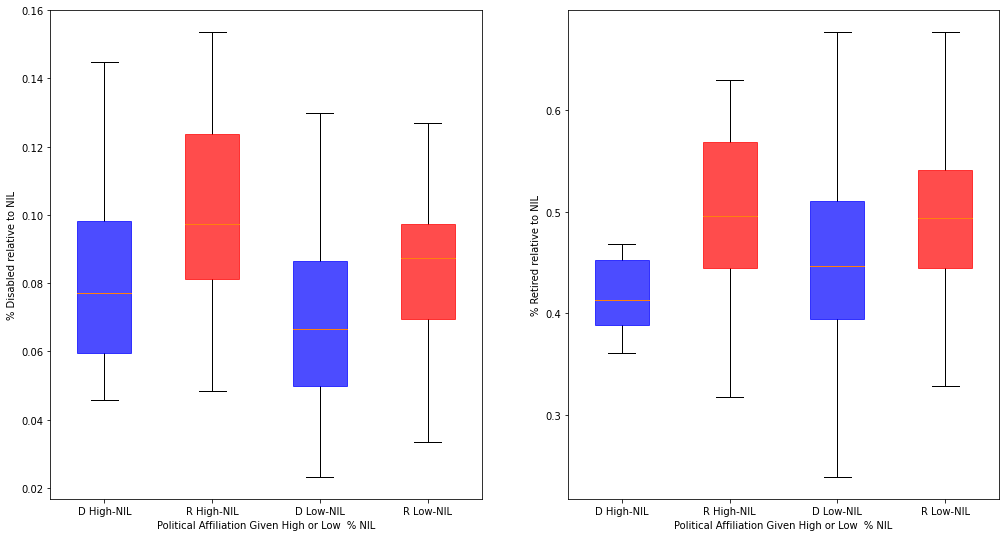

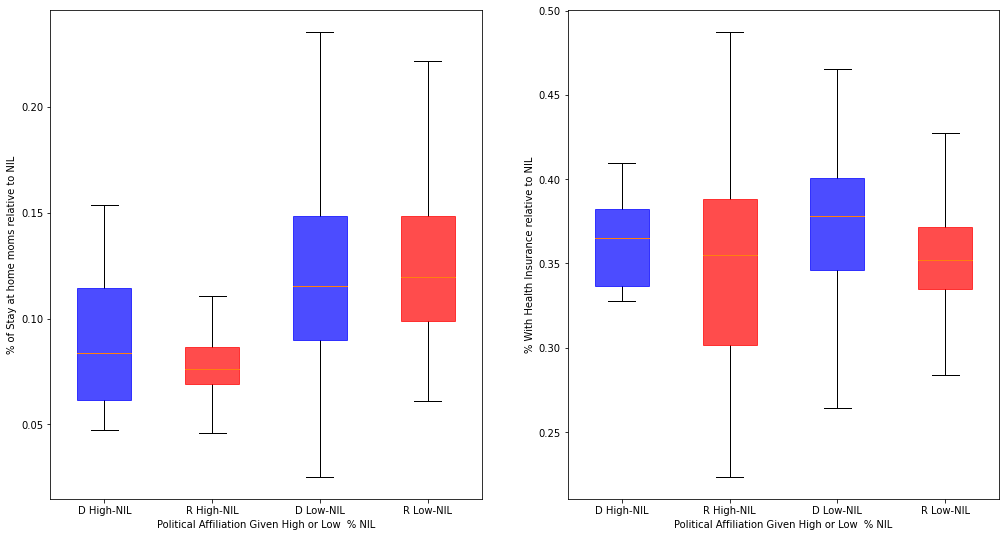

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(17, 9))


var = 'disabled'

a1 = democrats_high[var]/democrats_high['Not in labor force']
a2 = republicans_high[var]/republicans_high['Not in labor force']
a3= democrats_low[var]/democrats_low['Not in labor force']
a4= republicans_low[var]/republicans_low['Not in labor force']
data = [a1,a2,a3,a4]
bp1 = ax1.boxplot(data,patch_artist=True, labels=['D High-NIL','R High-NIL','D Low-NIL','R Low-NIL'],showfliers=False,widths=0.5)
bp1['boxes'][0].set_facecolor('blue')
bp1['boxes'][0].set_color('blue')
bp1['boxes'][0].set_alpha(0.7)
bp1['boxes'][1].set_facecolor('red')
bp1['boxes'][1].set_color('red')
bp1['boxes'][1].set_alpha(0.7)
bp1['boxes'][2].set_facecolor('blue')
bp1['boxes'][2].set_color('blue')
bp1['boxes'][2].set_alpha(0.7)
bp1['boxes'][3].set_facecolor('red')
bp1['boxes'][3].set_color('red')
bp1['boxes'][3].set_alpha(0.7)

# Change labels for each var
ax1.set_xlabel("Political Affiliation Given High or Low  % NIL")
ax1.set_ylabel("% Disabled relative to NIL")



var = 'Retired'

a1 = democrats_high[var]/democrats_high['Not in labor force']
a2 = republicans_high[var]/republicans_high['Not in labor force']
a3= democrats_low[var]/democrats_low['Not in labor force']
a4= republicans_low[var]/republicans_low['Not in labor force']
data = [a1,a2,a3,a4]
bp = ax2.boxplot(data,patch_artist=True, labels=['D High-NIL','R High-NIL','D Low-NIL','R Low-NIL'],showfliers=False,widths=0.5)
bp['boxes'][0].set_facecolor('blue')
bp['boxes'][0].set_color('blue')
bp['boxes'][0].set_alpha(0.7)
bp['boxes'][1].set_facecolor('red')
bp['boxes'][1].set_color('red')
bp['boxes'][1].set_alpha(0.7)
bp['boxes'][2].set_facecolor('blue')
bp['boxes'][2].set_color('blue')
bp['boxes'][2].set_alpha(0.7)
bp['boxes'][3].set_facecolor('red')
bp['boxes'][3].set_color('red')
bp['boxes'][3].set_alpha(0.7)

# Change labels for each var
ax2.set_xlabel("Political Affiliation Given High or Low  % NIL")
ax2.set_ylabel("% Retired relative to NIL")
plt.show()

fig, (ax3, ax4) = plt.subplots(nrows=1, ncols=2, figsize=(17, 9))


var = 'Housewife: Child-Under18 Husband-IL'

a1 = democrats_high[var]/democrats_high['Not in labor force']
a2 = republicans_high[var]/republicans_high['Not in labor force']
a3= democrats_low[var]/democrats_low['Not in labor force']
a4= republicans_low[var]/republicans_low['Not in labor force']
data = [a1,a2,a3,a4]
bp2 = ax3.boxplot(data,patch_artist=True, labels=['D High-NIL','R High-NIL','D Low-NIL','R Low-NIL'],showfliers=False,widths=0.5)
bp2['boxes'][0].set_facecolor('blue')
bp2['boxes'][0].set_color('blue')
bp2['boxes'][0].set_alpha(0.7)
bp2['boxes'][1].set_facecolor('red')
bp2['boxes'][1].set_color('red')
bp2['boxes'][1].set_alpha(0.7)
bp2['boxes'][2].set_facecolor('blue')
bp2['boxes'][2].set_color('blue')
bp2['boxes'][2].set_alpha(0.7)
bp2['boxes'][3].set_facecolor('red')
bp2['boxes'][3].set_color('red')
bp2['boxes'][3].set_alpha(0.7)

# Change labels for each var
ax3.set_xlabel("Political Affiliation Given High or Low  % NIL")
ax3.set_ylabel("% of Stay at home moms relative to NIL")


var = 'With Health Insurance NIL'

a1 = democrats_high[var]/democrats_high['Not in labor force']
a2 = republicans_high[var]/republicans_high['Not in labor force']
a3= democrats_low[var]/democrats_low['Not in labor force']
a4= republicans_low[var]/republicans_low['Not in labor force']
data = [a1,a2,a3,a4]
bp3 = ax4.boxplot(data,patch_artist=True, labels=['D High-NIL','R High-NIL','D Low-NIL','R Low-NIL'],showfliers=False,widths=0.5)
bp3['boxes'][0].set_facecolor('blue')
bp3['boxes'][0].set_color('blue')
bp3['boxes'][0].set_alpha(0.7)
bp3['boxes'][1].set_facecolor('red')
bp3['boxes'][1].set_color('red')
bp3['boxes'][1].set_alpha(0.7)
bp3['boxes'][2].set_facecolor('blue')
bp3['boxes'][2].set_color('blue')
bp3['boxes'][2].set_alpha(0.7)
bp3['boxes'][3].set_facecolor('red')
bp3['boxes'][3].set_color('red')
bp3['boxes'][3].set_alpha(0.7)

# Change labels for each var
ax4.set_xlabel("Political Affiliation Given High or Low  % NIL")
ax4.set_ylabel("% With Health Insurance relative to NIL")
# Show the chart
plt.show()

# Conclusion:

As hypothesized republicans have a higher median age, as well as a higher percent of retired people, disabled people and lower percent of health care coverage. Due to this, they tend to have a higher not in labor force participation rate than democrats, since these are the major areas that make up the not in the labor force segment. The one variable that could be analyzed further is the rate of stay at home moms, which provides inconclusive results.